In [1]:
import pandas as pd
"""
Read the full df, since kafka-specific df is broken at the time of writing.
"""

path = "../../data/processed/short-test-3/prom_and_yolo_data/intermediate/full.feather"
df = pd.read_feather(path)

In [5]:
"""
Full DF has so many kafka-specific metrics.

Print them out and then maybe try to sort them somehow...
"""
sorted(df.columns)
for column in df.columns:
    if "kafka" in column and "broker_1" in column:
        print(column)

{"__name__":"kafka_cluster_partition_atminisr","instance":"kafka_broker_1:11001","job":"kafka","partition":"1","topic":"__consumer_offsets"}
{"__name__":"kafka_cluster_partition_atminisr","instance":"kafka_broker_1:11001","job":"kafka","partition":"1","topic":"yolo_input"}
{"__name__":"kafka_cluster_partition_atminisr","instance":"kafka_broker_1:11001","job":"kafka","partition":"10","topic":"__consumer_offsets"}
{"__name__":"kafka_cluster_partition_atminisr","instance":"kafka_broker_1:11001","job":"kafka","partition":"13","topic":"__consumer_offsets"}
{"__name__":"kafka_cluster_partition_atminisr","instance":"kafka_broker_1:11001","job":"kafka","partition":"16","topic":"__consumer_offsets"}
{"__name__":"kafka_cluster_partition_atminisr","instance":"kafka_broker_1:11001","job":"kafka","partition":"19","topic":"__consumer_offsets"}
{"__name__":"kafka_cluster_partition_atminisr","instance":"kafka_broker_1:11001","job":"kafka","partition":"22","topic":"__consumer_offsets"}
{"__name__":"kaf

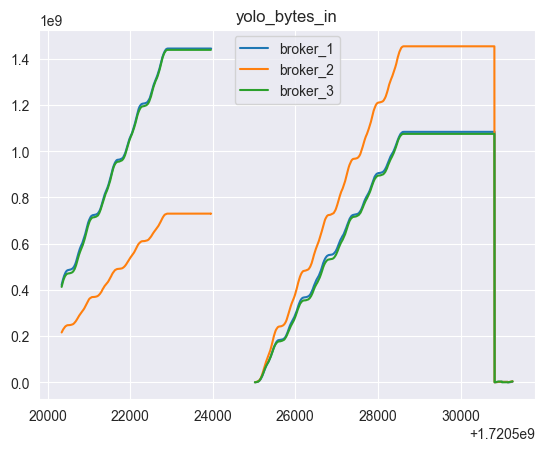

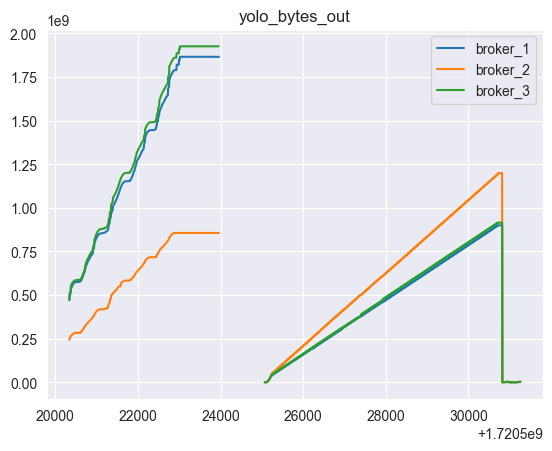

In [12]:
from matplotlib import pyplot as plt
"""
Do some plotting and try to find interesting properties
"""
def plot_metric(header, legend_name):
    """ Plots the given metric for all three brokers. 
    Expects that the given header is for broker_1, which is then automatically replaced with brokers 2 and 3.
    """
    df_kafka = pd.DataFrame()
    for i in range(1,4):
        h = header.replace("kafka_broker_1", f"kafka_broker_{i}")
        df_kafka[f"broker_{i}"] = df[h]
    df_kafka.plot()
    plt.title(legend_name)
plot_metric('{"__name__":"kafka_server_brokertopicmetrics_bytesin_total","instance":"kafka_broker_1:11001","job":"kafka","topic":"yolo_input"}', "yolo_bytes_in")
plot_metric('{"__name__":"kafka_server_brokertopicmetrics_bytesout_total","instance":"kafka_broker_1:11001","job":"kafka","topic":"yolo_input"}', "yolo_bytes_out")